In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_folder_path='/content/drive/MyDrive/breast cancer dataset'

**Importing the dependencies**

In [ ]:
import os #used for reading or writing to the file system
import numpy as np #used for handling arrays and matrices
import matplotlib.pyplot as plt #graph
import matplotlib.image as mpimg #submodule of matplotlib specifically for reading and displaying images
import cv2 #image processing
from google.colab.patches import cv2_imshow #to display images using opencv
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
non_idc=os.listdir('/content/drive/MyDrive/breast cancer dataset/non_idc')
print(non_idc[0:5])
print(non_idc[-5:])

['14192_idx5_x701_y701_class0.png', '14192_idx5_x2351_y2501_class0.png', '14192_idx5_x701_y2201_class0.png', '14192_idx5_x1151_y701_class0.png', '14210_idx5_x1201_y201_class0.png']
['14189_idx5_x1801_y351_class0.png', '13689_idx5_x451_y1151_class0.png', '14189_idx5_x2501_y1601_class0.png', '14188_idx5_x301_y551_class0.png', '14189_idx5_x2801_y951_class0.png']


In [ ]:
idc=os.listdir('/content/drive/MyDrive/breast cancer dataset/idc')
print(idc[0:5])
print(idc[:-5])

['15634_idx5_x851_y1351_class1.png', '15634_idx5_x701_y1951_class1.png', '15634_idx5_x2251_y851_class1.png', '15634_idx5_x651_y1851_class1.png', '15633_idx5_x1051_y551_class1.png']
['15634_idx5_x851_y1351_class1.png', '15634_idx5_x701_y1951_class1.png', '15634_idx5_x2251_y851_class1.png', '15634_idx5_x651_y1851_class1.png', '15633_idx5_x1051_y551_class1.png', '15634_idx5_x2101_y1251_class1.png', '15633_idx5_x1201_y901_class1.png', '15634_idx5_x2201_y1401_class1.png', '15633_idx5_x1451_y901_class1.png', '15633_idx5_x951_y251_class1.png', '15633_idx5_x1051_y451_class1.png', '15633_idx5_x1401_y451_class1.png', '15633_idx5_x1201_y601_class1.png', '15634_idx5_x2251_y1551_class1.png', '15633_idx5_x1551_y451_class1.png', '15633_idx5_x1251_y751_class1.png', '15633_idx5_x1001_y551_class1.png', '15633_idx5_x751_y651_class1.png', '15633_idx5_x1001_y851_class1.png', '15634_idx5_x2351_y751_class1.png', '15633_idx5_x1301_y851_class1.png', '15634_idx5_x2551_y1451_class1.png', '15633_idx5_x1251_y851_c

In [ ]:
#no of idc cases and non idc cases
print('Number of IDC cases:',len(idc))
print('Number of non IDC cases:',len(non_idc))

Number of IDC cases: 12569
Number of non IDC cases: 14069


**Creating Labels for two class of images**

**IDC-->1**
**non IDC-->0**

In [ ]:
#create the labels
idc=[1]*12569
non_idc=[0]*14069

In [ ]:
print(idc[0:5])
print(non_idc[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(idc))
print(len(non_idc))

12569
14069


In [ ]:
labels=idc+non_idc
print(len(labels))
print(labels[0:5])
print(labels[-5:])

26638
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


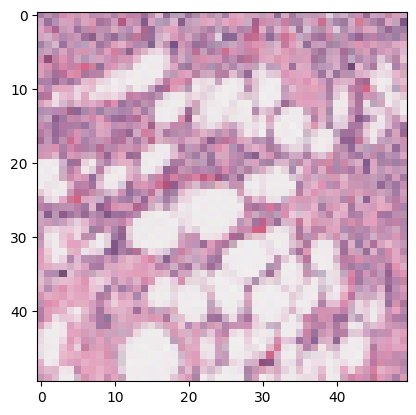

In [ ]:
#displaying idc image
img=mpimg.imread('/content/drive/MyDrive/breast cancer dataset/idc/15634_idx5_x2401_y951_class1.png')
imgplot=plt.imshow(img)
plt.show()

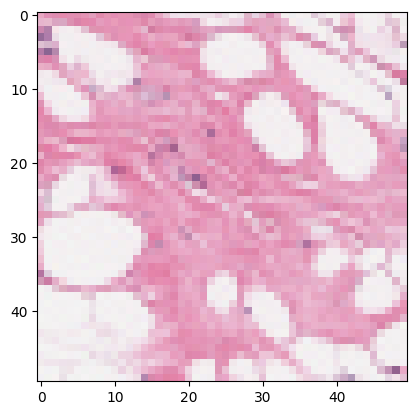

In [ ]:
#displaying non_idc image
img=mpimg.imread('/content/drive/MyDrive/breast cancer dataset/non_idc/14210_idx5_x1201_y801_class0.png')
imgplot=plt.imshow(img)
plt.show()

**Image Processing**

**1.Resize the images 2.Convert the images to numpy arrays**

In [ ]:
idc_path = '/content/drive/MyDrive/breast cancer dataset/idc'
non_idc_path = '/content/drive/MyDrive/breast cancer dataset/non_idc'

data = []

# Load images from idc_path
for img_file in os.listdir(idc_path):
    image = Image.open(os.path.join(idc_path, img_file))
    image = image.resize((128, 128))  # Resize the image
    image = image.convert('RGB')  # Convert to RGB mode
    image = np.array(image)  # Convert to numpy array
    data.append(image)

# Load images from non_idc_path
for img_file in os.listdir(non_idc_path):
    image = Image.open(os.path.join(non_idc_path, img_file))
    image = image.resize((128, 128))  # Resize the image
    image = image.convert('RGB')  # Convert to RGB mode
    image = np.array(image)  # Convert to numpy array
    data.append(image)


In [ ]:
len(data)

26638

array([[[228, 174, 194],
        [228, 173, 194],
        [227, 169, 191],
        ...,
        [207, 155, 187],
        [202, 152, 185],
        [199, 152, 185]],

       [[226, 172, 194],
        [226, 171, 194],
        [226, 168, 191],
        ...,
        [204, 152, 185],
        [199, 149, 183],
        [197, 149, 183]],

       [[221, 168, 194],
        [222, 167, 194],
        [224, 166, 192],
        ...,
        [195, 144, 181],
        [194, 141, 179],
        [194, 140, 179]],

       ...,

       [[208, 162, 182],
        [210, 167, 187],
        [215, 182, 199],
        ...,
        [224, 165, 192],
        [231, 170, 195],
        [233, 173, 196]],

       [[220, 204, 216],
        [222, 207, 219],
        [229, 218, 227],
        ...,
        [229, 166, 195],
        [231, 169, 198],
        [231, 171, 198]],

       [[224, 218, 228],
        [227, 221, 230],
        [234, 231, 236],
        ...,
        [231, 167, 196],
        [231, 169, 199],
        [231, 171, 200]]], dtype=uint8)
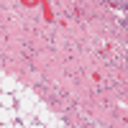

In [ ]:
data[0]


In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
#converting image list and label list to numpy arrays
x=np.array(data)
y=np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)

(26638, 128, 128, 3)
(26638,)


**Train Test Split**

In [ ]:
# Check the length of the x and y variables
x_len = len(x)
y_len = len(y)

# If the x variable is longer, truncate it to the same length as y
if x_len > y_len:
    x = x[:y_len]

# If the y variable is longer, truncate it to the same length as x
elif y_len > x_len:
    y = y[:x_len]

# Now you can call the train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(26638, 128, 128, 3) (21310, 128, 128, 3) (5328, 128, 128, 3)


In [ ]:
#scaling the data
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [ ]:

x_train_scaled[0]

array([[[0.96862745, 0.96470588, 0.96862745],
        [0.96862745, 0.96470588, 0.96862745],
        [0.96470588, 0.96078431, 0.96470588],
        ...,
        [0.96078431, 0.96078431, 0.96862745],
        [0.96470588, 0.96470588, 0.96862745],
        [0.96470588, 0.96470588, 0.96862745]],

       [[0.96862745, 0.96470588, 0.96862745],
        [0.96862745, 0.96470588, 0.96862745],
        [0.96470588, 0.96078431, 0.96470588],
        ...,
        [0.96078431, 0.96078431, 0.96862745],
        [0.96470588, 0.96470588, 0.96862745],
        [0.96470588, 0.96470588, 0.96862745]],

       [[0.96862745, 0.96470588, 0.97254902],
        [0.96862745, 0.96470588, 0.97254902],
        [0.96470588, 0.96078431, 0.96470588],
        ...,
        [0.96078431, 0.96078431, 0.96470588],
        [0.96470588, 0.96078431, 0.96470588],
        [0.96470588, 0.96078431, 0.96470588]],

       ...,

       [[0.80784314, 0.69019608, 0.78823529],
        [0.81960784, 0.70588235, 0.8       ],
        [0.85490196, 0

**Building a Convolutional Neural Networks**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes=2
model=keras.Sequential()

#first convolutional block
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#second convolutional block
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#flattening 3D to 1D
model.add(keras.layers.Flatten())

#first dense layer
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

#second dense layer
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

#output layer
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid'))




In [ ]:
#compile the neural network
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
!nvidia-smi

Sat May 25 05:23:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   45C    P0              27W /  72W |    323MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Train the model
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=10)#trains CNN model with training data for 10 epochs and using 10% of the training data for validation

Epoch 1/10
600/600 [==============================] - 14s 15ms/step - loss: 0.4252 - acc: 0.8174 - val_loss: 0.4527 - val_acc: 0.8212
Epoch 2/10
600/600 [==============================] - 7s 12ms/step - loss: 0.3427 - acc: 0.8592 - val_loss: 0.2880 - val_acc: 0.8756
Epoch 3/10
600/600 [==============================] - 7s 12ms/step - loss: 0.3541 - acc: 0.8595 - val_loss: 0.3502 - val_acc: 0.8329
Epoch 4/10
600/600 [==============================] - 7s 12ms/step - loss: 0.3356 - acc: 0.8585 - val_loss: 0.3543 - val_acc: 0.8461
Epoch 5/10
600/600 [==============================] - 7s 12ms/step - loss: 0.3150 - acc: 0.8676 - val_loss: 0.3379 - val_acc: 0.8531
Epoch 6/10
600/600 [==============================] - 7s 12ms/step - loss: 0.3107 - acc: 0.8686 - val_loss: 0.2788 - val_acc: 0.8808
Epoch 7/10
600/600 [==============================] - 7s 12ms/step - loss: 0.2950 - acc: 0.8780 - val_loss: 0.3197 - val_acc: 0.8573
Epoch 8/10
600/600 [==============================] - 7s 12ms/step -

**Model Evaluation**

In [ ]:
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print("Test Accuracy=",accuracy)

167/167 [==============================] - 1s 6ms/step - loss: 0.3258 - acc: 0.8538
Test Accuracy= 0.8537912964820862


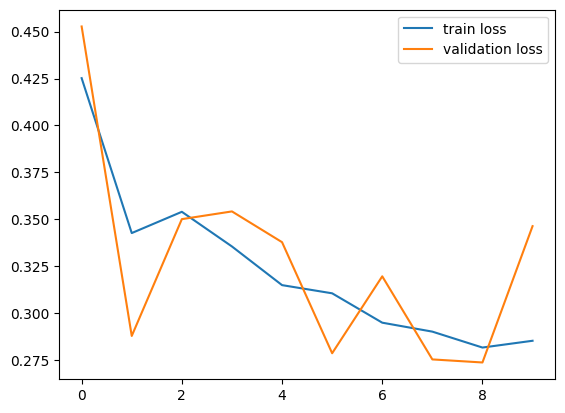

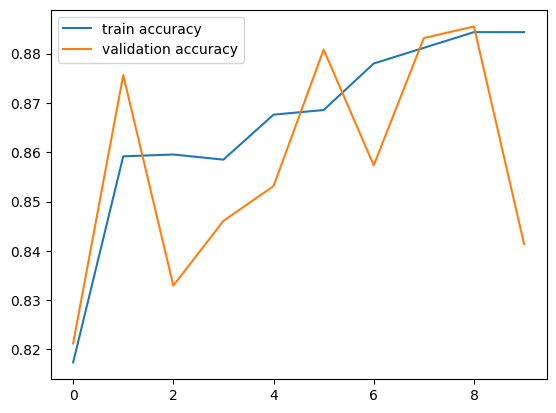

In [ ]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()


#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()




**Predictive System**

Path of the image to be predicted:/content/WhatsApp Image 2024-05-24 at 19.52.13.jpeg


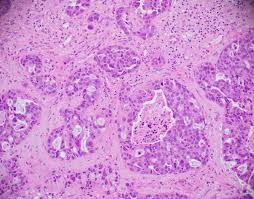

1/1 [==============================] - 0s 26ms/step
[[0.00758974 0.96411794]]
1
The person contains INVASIVE DUCTAL CARCINOMA


In [ ]:
input_image_path=input("Path of the image to be predicted:")

input_image=cv2.imread(input_image_path)#reading the image

cv2_imshow(input_image)#displaying the image

input_image_resized=cv2.resize(input_image,(128,128))#resizing the image to the trained size

input_image_scaled=input_image_resized/255#scaling the image

input_image_reshaped=np.reshape(input_image_scaled,[1,128,128,3]) #1-predicting for one image,128- height,128-width,3-colour channel

input_prediction=model.predict(input_image_reshaped)#saying model to predict the reshaped image

print(input_prediction)#1st neuron-probability of idc
                       #2nd neuron-probability of non idc

input_pred_label=np.argmax(input_prediction)#if 1st is max,then it gives output as "1" else "0"

print(input_pred_label)

if input_pred_label==1:
  print("The person contains INVASIVE DUCTAL CARCINOMA")
else:
  print("The person does not contain IDC")